## Import Libraries

In [124]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


pd.set_option('display.max_columns', None)

## Load the Data

#### Songs Data

In [126]:
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [127]:
data = data.loc[data['track_genre'].isin(['k-pop', 'indian', 'pop', 'dance', 'hip-hop'])]
data.shape

(5000, 21)

#### User Data

In [128]:
user = pd.read_csv('spotify_tracks_f.csv')
user.head()

,source,track_uri,track_name,artist_name,artist_popularity,artist_genres,album,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,playlist,spotify:track:7GE3LwWzboPaTN0TlDcPs1,Khwab Dekhe Sexy Lady,Pritam,85,"['filmi', 'indian instrumental', 'modern bolly...",Race (Original Motion Picture Soundtrack),54,0.818,0.829,8,-7.145,0,0.0978,0.303,0.000085,0.2770,0.967,108.999,audio_features,7GE3LwWzboPaTN0TlDcPs1,spotify:track:7GE3LwWzboPaTN0TlDcPs1,https://api.spotify.com/v1/tracks/7GE3LwWzboPa...,https://api.spotify.com/v1/audio-analysis/7GE3...,279357,4
1,playlist,spotify:track:2ibipg9GBEZ5YKOdskobJZ,"Laal Peeli Akhiyaan (From ""Teri Baaton Mein Ai...",Tanishk Bagchi,75,"['desi pop', 'filmi', 'modern bollywood']","Laal Peeli Akhiyaan (From ""Teri Baaton Mein Ai...",63,0.844,0.794,8,-5.943,1,0.0475,0.131,0.000274,0.0525,0.670,129.986,audio_features,2ibipg9GBEZ5YKOdskobJZ,spotify:track:2ibipg9GBEZ5YKOdskobJZ,https://api.spotify.com/v1/tracks/2ibipg9GBEZ5...,https://api.spotify.com/v1/audio-analysis/2ibi...,188101,4
2,playlist,spotify:track:1vBmaijoCBoqmwc3zs5n3s,Dus Bahane,Shaan,67,"['filmi', 'modern bollywood']",Dus,56,0.833,0.917,7,-5.498,1,0.0597,0.175,0.000002,0.1090,0.874,110.001,audio_features,1vBmaijoCBoqmwc3zs5n3s,spotify:track:1vBmaijoCBoqmwc3zs5n3s,https://api.spotify.com/v1/tracks/1vBmaijoCBoq...,https://api.spotify.com/v1/audio-analysis/1vBm...,206947,4
3,playlist,spotify:track:3jyqXdAjwqO3gFtjnYrbq9,"Ek Ladki Ko Dekha Toh Aisa Laga (From ""Ek Ladk...",Darshan Raval,75,"['desi pop', 'filmi', 'gujarati pop', 'modern ...","Ek Ladki Ko Dekha Toh Aisa Laga (From ""Ek Ladk...",49,0.537,0.604,10,-7.576,1,0.0540,0.757,0.000000,0.3220,0.410,173.915,audio_features,3jyqXdAjwqO3gFtjnYrbq9,spotify:track:3jyqXdAjwqO3gFtjnYrbq9,https://api.spotify.com/v1/tracks/3jyqXdAjwqO3...,https://api.spotify.com/v1/audio-analysis/3jyq...,155172,4
4,playlist,spotify:track:2g3o6I7YuKFEUn9OOfuAfP,Naina Da Kya Kasoor,Amit Trivedi,66,"['filmi', 'modern bollywood']",Andhadhun (Original Motion Picture Soundtrack),59,0.712,0.659,9,-6.348,1,0.0538,0.159,0.012900,0.0781,0.545,63.048,audio_features,2g3o6I7YuKFEUn9OOfuAfP,spotify:track:2g3o6I7YuKFEUn9OOfuAfP,https://api.spotify.com/v1/tracks/2g3o6I7YuKFE...,https://api.spotify.com/v1/audio-analysis/2g3o...,210952,4


### Basic EDA

#### Songs Data

In [129]:
data.shape

(5000, 21)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 20000 to 81999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   track_id          5000 non-null   object 
 2   artists           4999 non-null   object 
 3   album_name        4999 non-null   object 
 4   track_name        4999 non-null   object 
 5   popularity        5000 non-null   int64  
 6   duration_ms       5000 non-null   int64  
 7   explicit          5000 non-null   bool   
 8   danceability      5000 non-null   float64
 9   energy            5000 non-null   float64
 10  key               5000 non-null   int64  
 11  loudness          5000 non-null   float64
 12  mode              5000 non-null   int64  
 13  speechiness       5000 non-null   float64
 14  acousticness      5000 non-null   float64
 15  instrumentalness  5000 non-null   float64
 16  liveness          5000 non-null   float64


In [131]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54899.500000,42.892000,2.243721e+05,0.658891,0.648065,5.367400,-6.723947,0.546800,0.091625,0.289388,0.015506,0.173661,0.525990,118.642377,3.920000
std,20079.939593,30.098018,9.547397e+04,0.138379,0.180933,3.546171,2.917074,0.497855,0.084193,0.277897,0.091140,0.128944,0.216452,28.382181,0.410407
min,20000.000000,0.000000,0.000000e+00,0.191000,0.044100,0.000000,-25.631000,0.000000,0.023100,0.000030,0.000000,0.018800,0.036000,46.592000,1.000000
25%,51249.750000,2.000000,1.813630e+05,0.572000,0.531000,2.000000,-8.260500,0.000000,0.037975,0.051000,0.000000,0.092900,0.356000,95.949000,4.000000
50%,55499.500000,52.000000,2.106605e+05,0.676000,0.664500,6.000000,-6.217000,1.000000,0.057800,0.179000,0.000001,0.121000,0.527500,115.811500,4.000000
75%,65749.250000,67.000000,2.522065e+05,0.759250,0.792000,8.000000,-4.637000,1.000000,0.105000,0.489250,0.000118,0.213000,0.698000,136.045750,4.000000
max,81999.000000,100.000000,3.340672e+06,0.965000,0.994000,11.000000,0.366000,1.000000,0.889000,0.992000,0.984000,0.949000,0.972000,214.016000,5.000000


In [132]:
data.drop(columns = ['Unnamed: 0', 'track_id', 'explicit', 'album_name', 'track_genre'], inplace = True)

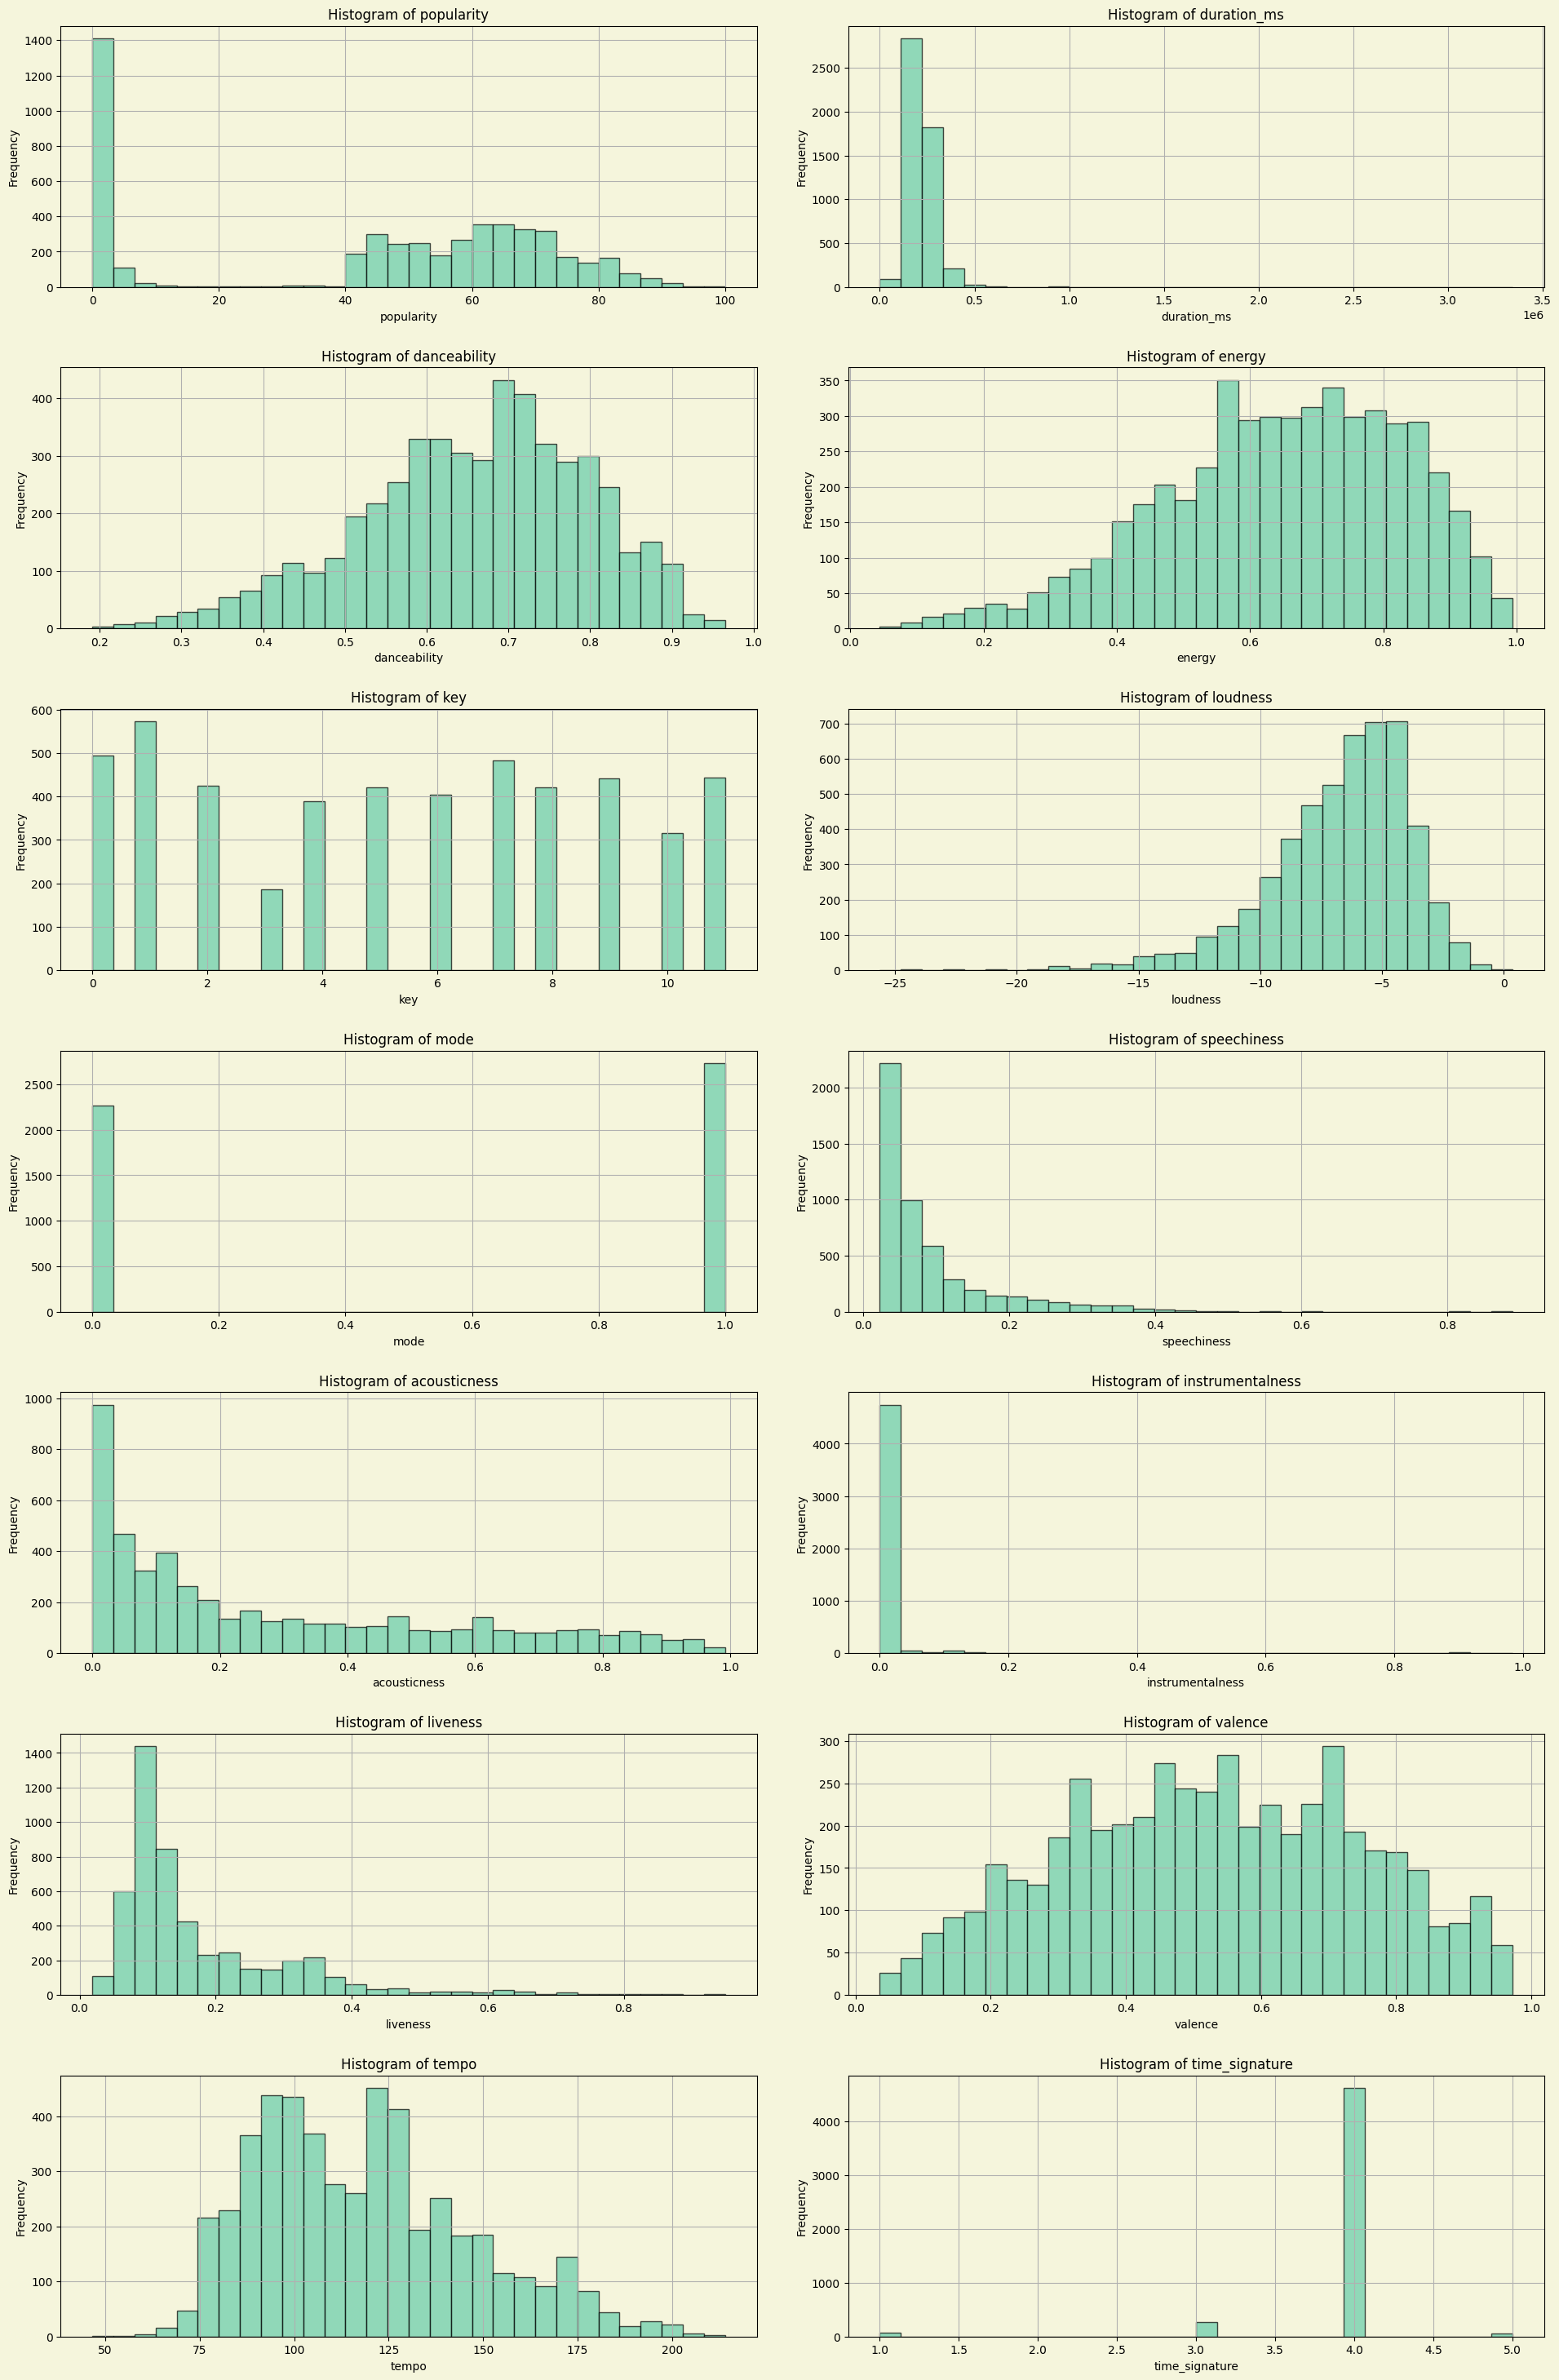

In [133]:
def histogram(df):
    # Extract numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Define the number of rows and columns for the grid
    n_rows = 7
    n_cols = 2

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30), facecolor='#F5F5DC')
    fig.tight_layout(pad=5.0)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot histograms for each numeric column
    for i, col in enumerate(numeric_columns):
        if i < n_rows * n_cols:
            ax = axes[i]
            ax.hist(df[col].dropna(), bins=30, edgecolor='k', alpha=0.7, color='#66CDAA')
            ax.set_facecolor('#F5F5DC')
            ax.set_title(f'Histogram of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.grid(True)

    # Hide any unused subplots
    for i in range(len(numeric_columns), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.show()
    
histogram(data)

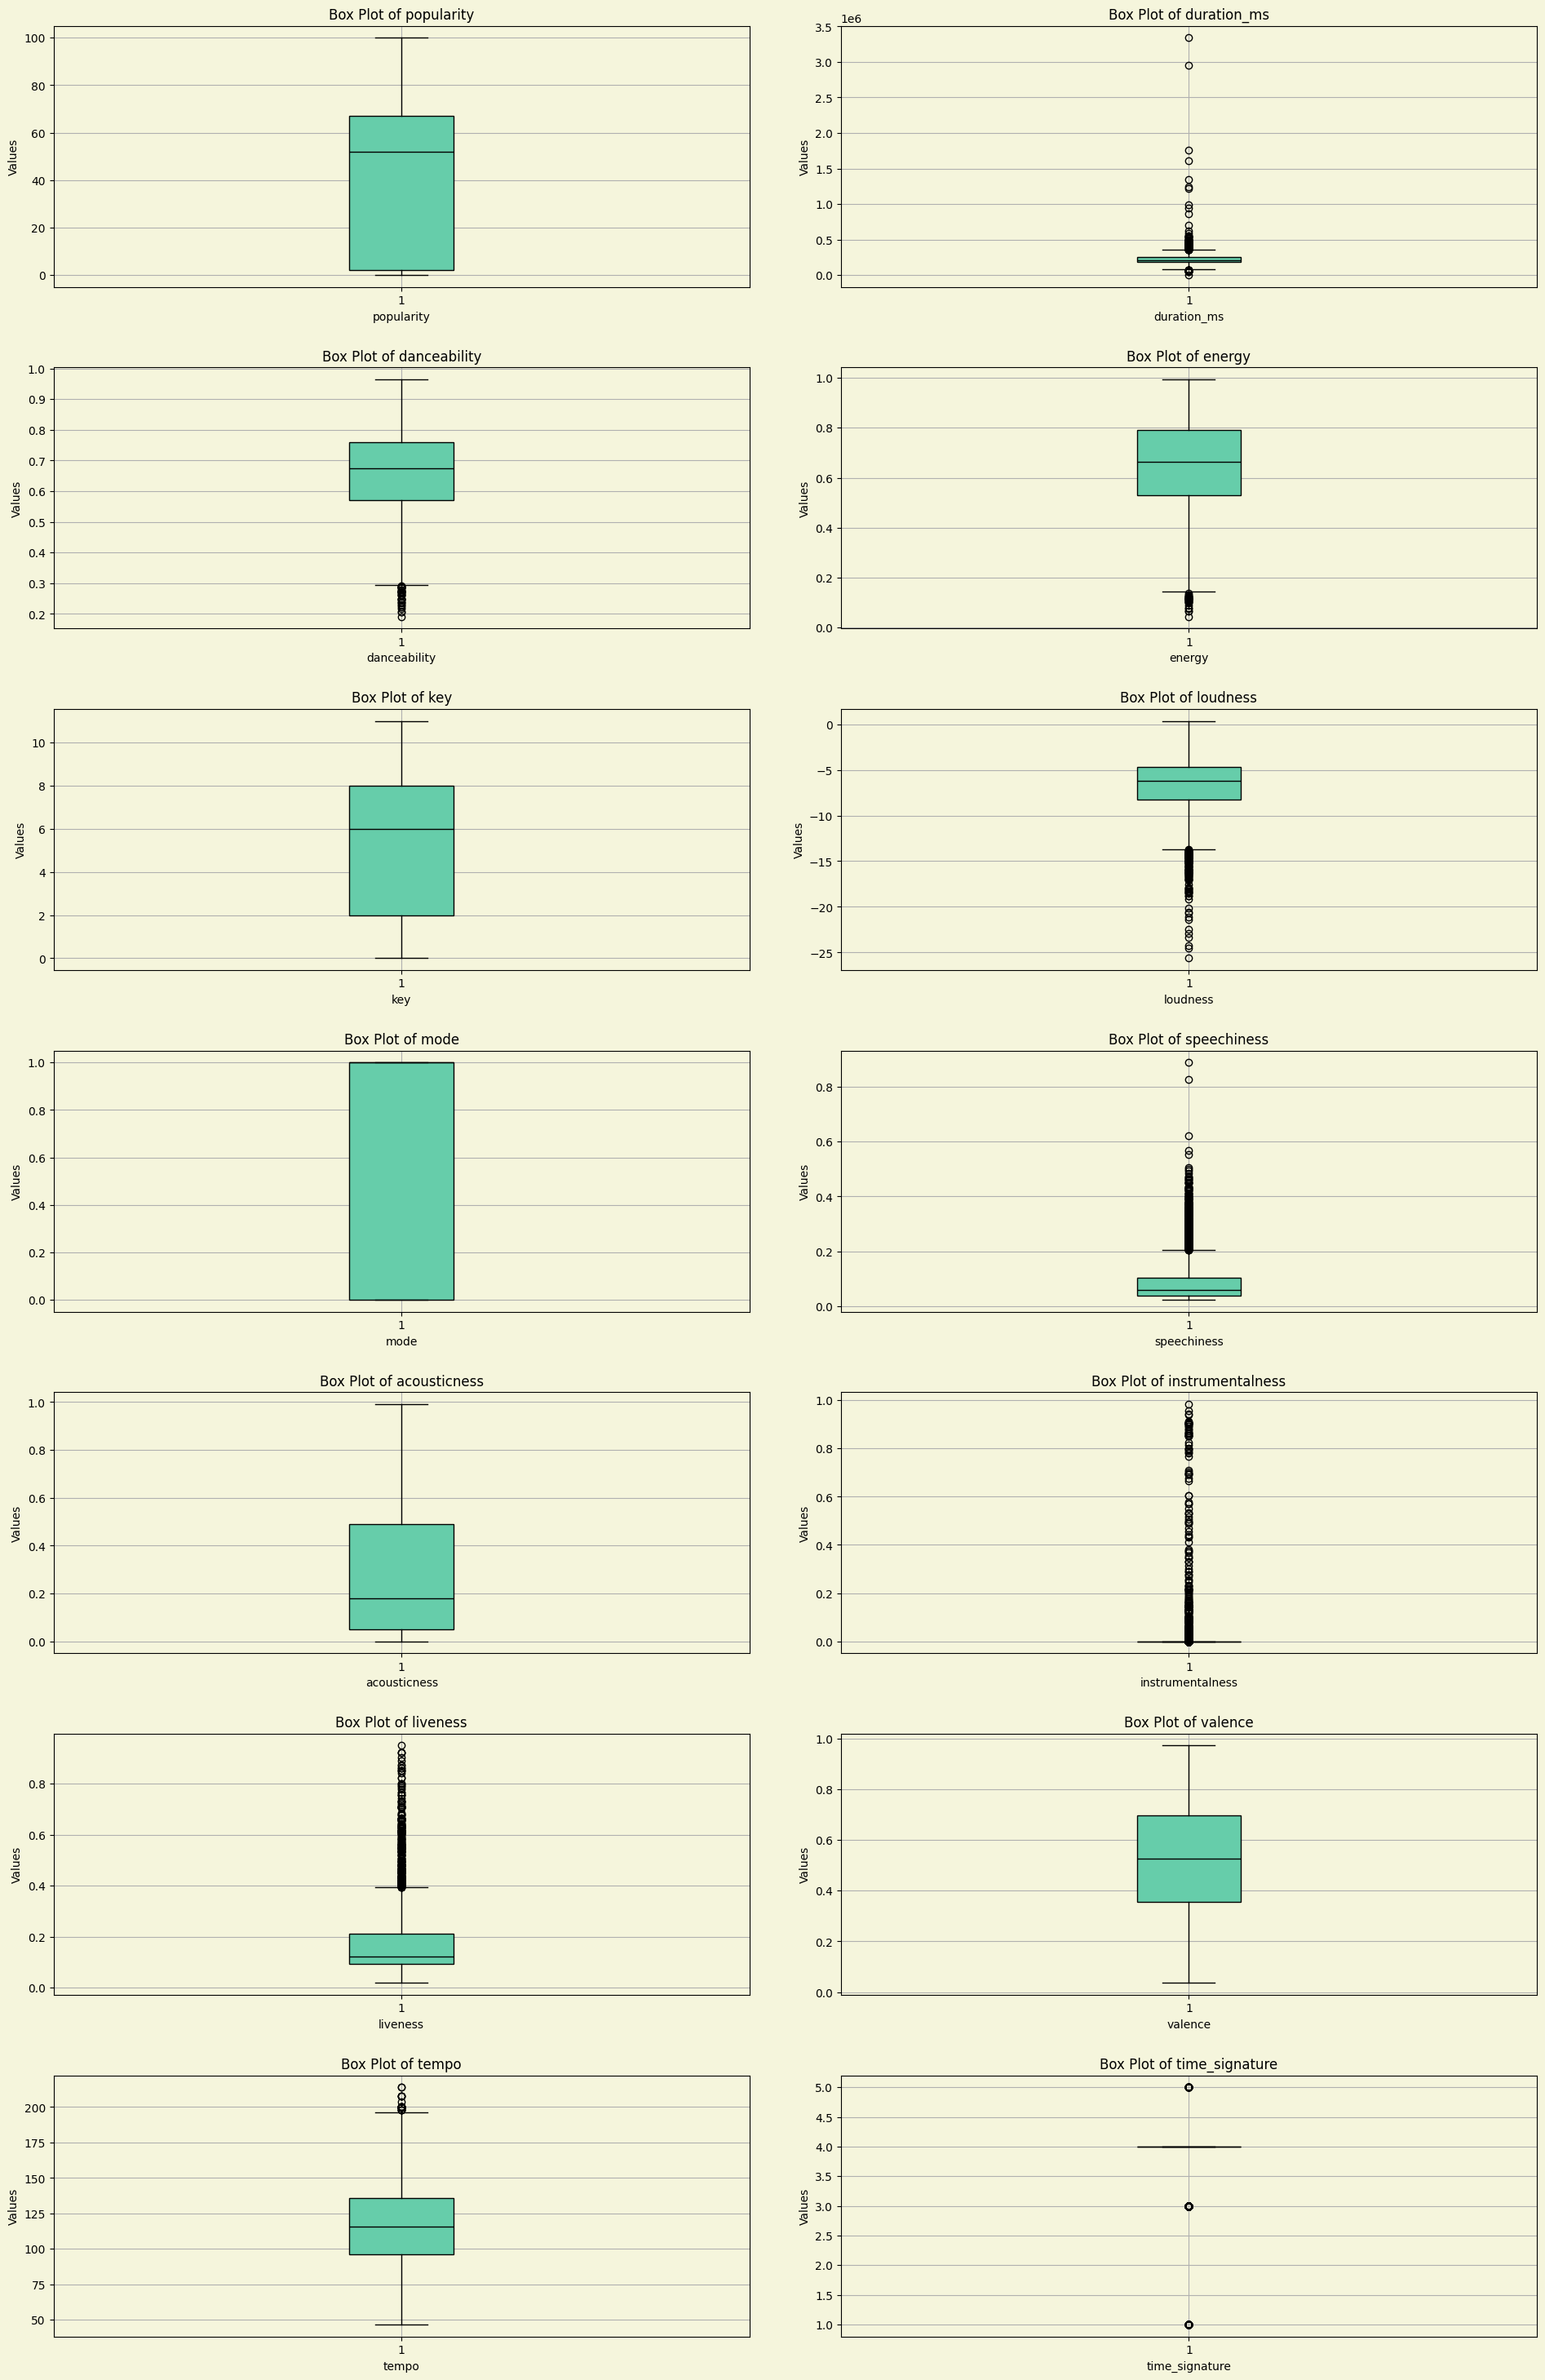

In [134]:
def boxplot(df):
    # Extract numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Create subplots with a pastel beige background
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30), facecolor='#F5F5DC')
    fig.tight_layout(pad=5.0)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot box plots for each numeric column
    for i, col in enumerate(numeric_columns):
        if i < n_rows * n_cols:
            ax = axes[i]
            ax.boxplot(df[col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor='#66CDAA', color='k'),
                    whiskerprops=dict(color='k'),
                    capprops=dict(color='k'),
                    medianprops=dict(color='k'),
                    flierprops=dict(markeredgecolor='k'))
            ax.set_title(f'Box Plot of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Values')
            ax.grid(True)
            ax.set_facecolor('#F5F5DC')  # Set background color of each subplot

    # Hide any unused subplots
    for i in range(len(numeric_columns), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.show()
    
boxplot(data)

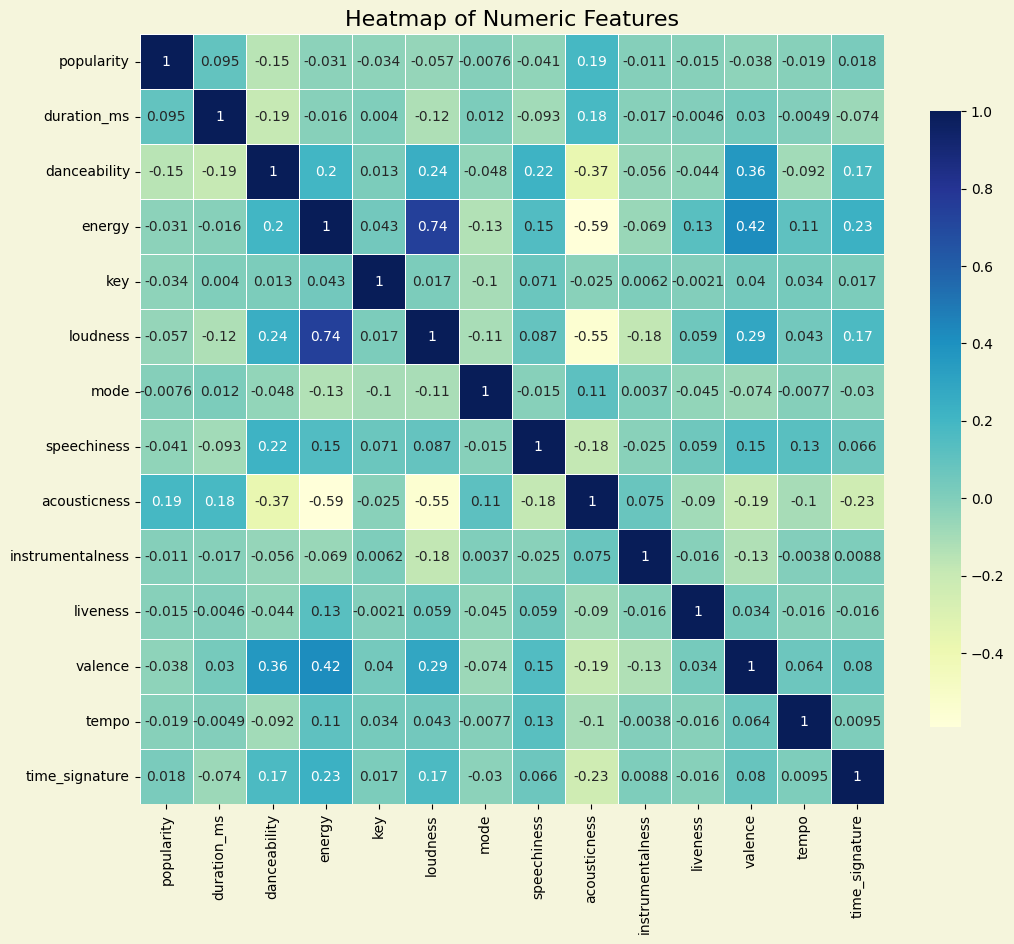

In [135]:
def heatmap(df):
    # Extract numeric columns
    numeric_df = data.select_dtypes(include=['number'])

    # Compute the correlation matrix
    corr = numeric_df.corr()

    # Create a heatmap with a pastel beige background and a complementary color palette
    plt.figure(figsize=(12, 10), facecolor='#F5F5DC')
    ax = sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=.5, cbar_kws={'shrink': .8})

    # Customize the plot appearance
    ax.set_facecolor('#F5F5DC')  # Set the background color
    plt.title('Heatmap of Numeric Features', fontsize=16)
    plt.show()
    
heatmap(data)

#### User data

In [136]:
user.shape

(311, 26)

In [137]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             311 non-null    object 
 1   track_uri          311 non-null    object 
 2   track_name         309 non-null    object 
 3   artist_name        309 non-null    object 
 4   artist_popularity  311 non-null    int64  
 5   artist_genres      311 non-null    object 
 6   album              309 non-null    object 
 7   track_popularity   311 non-null    int64  
 8   danceability       311 non-null    float64
 9   energy             311 non-null    float64
 10  key                311 non-null    int64  
 11  loudness           311 non-null    float64
 12  mode               311 non-null    int64  
 13  speechiness        311 non-null    float64
 14  acousticness       311 non-null    float64
 15  instrumentalness   311 non-null    float64
 16  liveness           311 non

In [138]:
user.describe()

,artist_popularity,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,67.784566,51.578778,0.620814,0.637064,5.405145,-6.807495,0.694534,0.059175,0.338331,0.009646,0.166089,0.535188,119.939424,246764.627010,3.877814
std,14.720248,17.448525,0.143608,0.168604,3.440251,2.514780,0.461347,0.052623,0.274013,0.072034,0.124021,0.217411,28.411204,64219.257582,0.473003
min,0.000000,0.000000,0.273000,0.201000,0.000000,-16.103000,0.000000,0.022900,0.000108,0.000000,0.026800,0.074400,63.048000,124541.000000,1.000000
25%,59.000000,45.000000,0.531500,0.517500,2.000000,-7.990500,0.000000,0.032450,0.098950,0.000000,0.094050,0.352000,96.953000,201544.000000,4.000000
50%,69.000000,54.000000,0.635000,0.649000,6.000000,-6.544000,1.000000,0.044700,0.278000,0.000001,0.115000,0.534000,115.007000,237547.000000,4.000000
75%,77.000000,63.000000,0.729000,0.778000,8.000000,-5.147500,1.000000,0.057350,0.566000,0.000076,0.191000,0.703000,139.912000,281856.000000,4.000000
max,100.000000,90.000000,0.950000,0.980000,11.000000,-1.992000,1.000000,0.413000,0.979000,0.861000,0.731000,0.972000,188.011000,613027.000000,5.000000


In [139]:
user.drop(['source','id', 'uri','track_href','analysis_url','track_uri','artist_genres', 'artist_popularity', 'type', 'album'], axis =1, inplace = True)

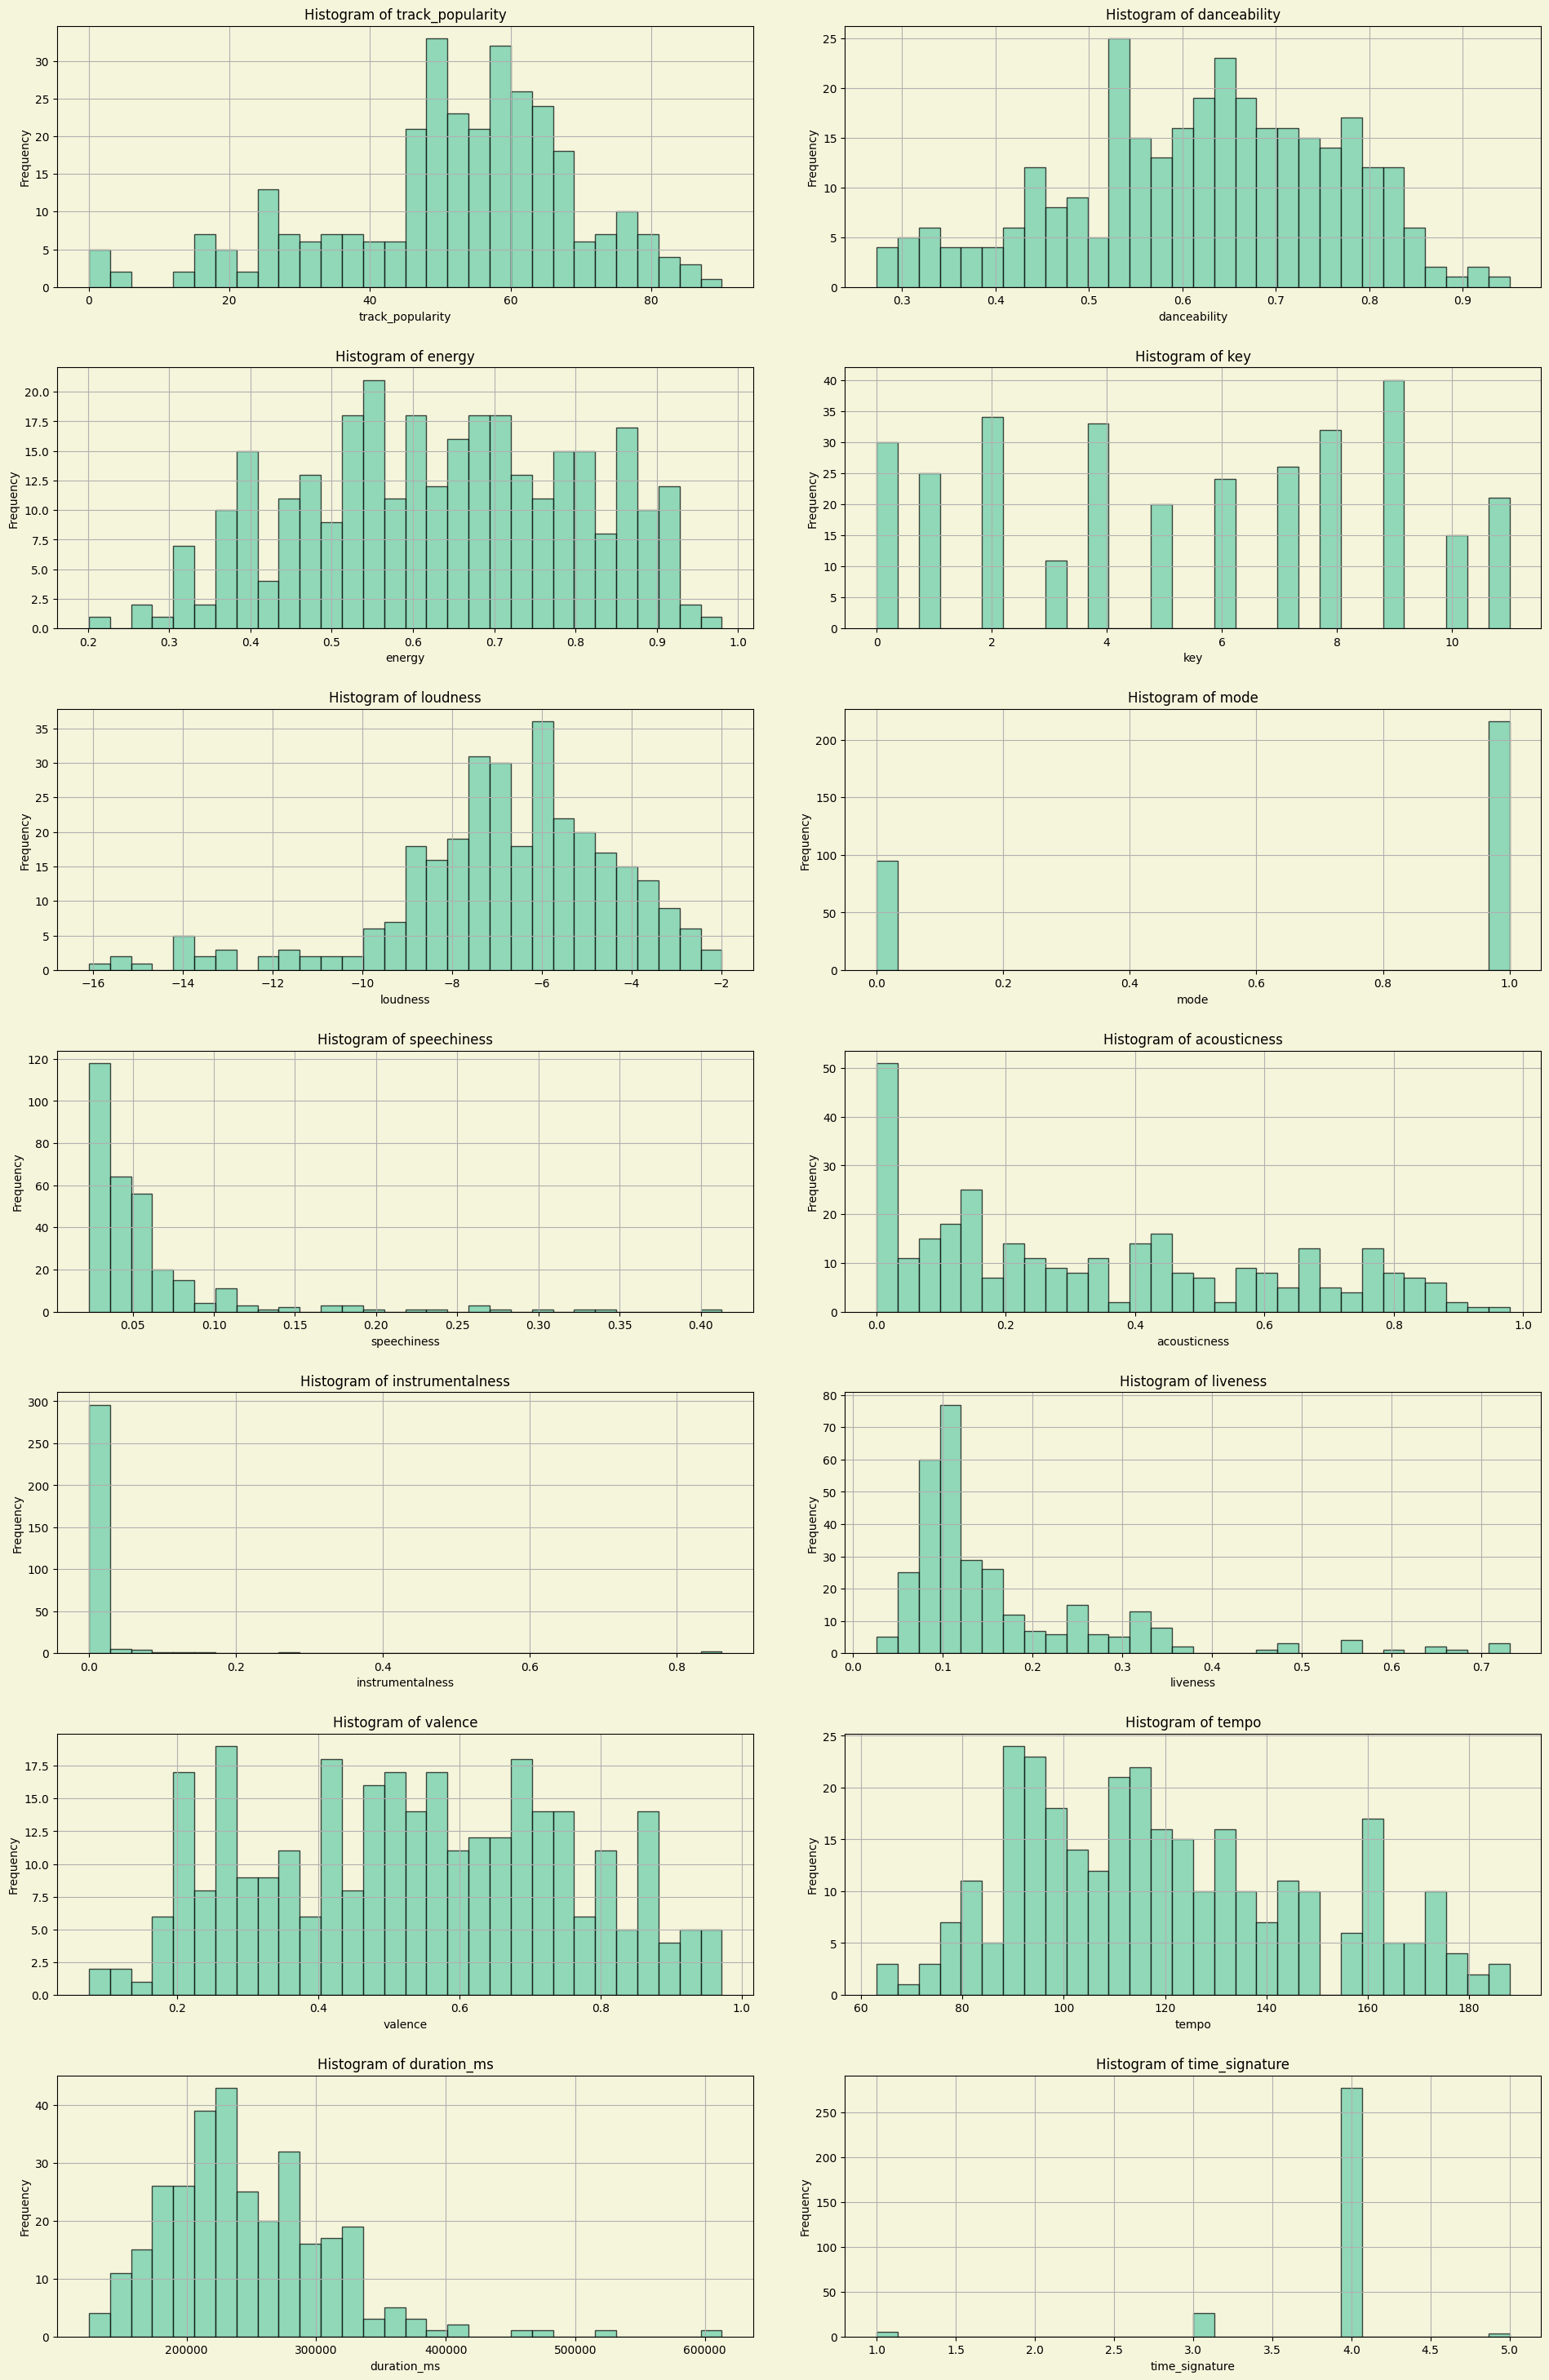

In [140]:
histogram(user)

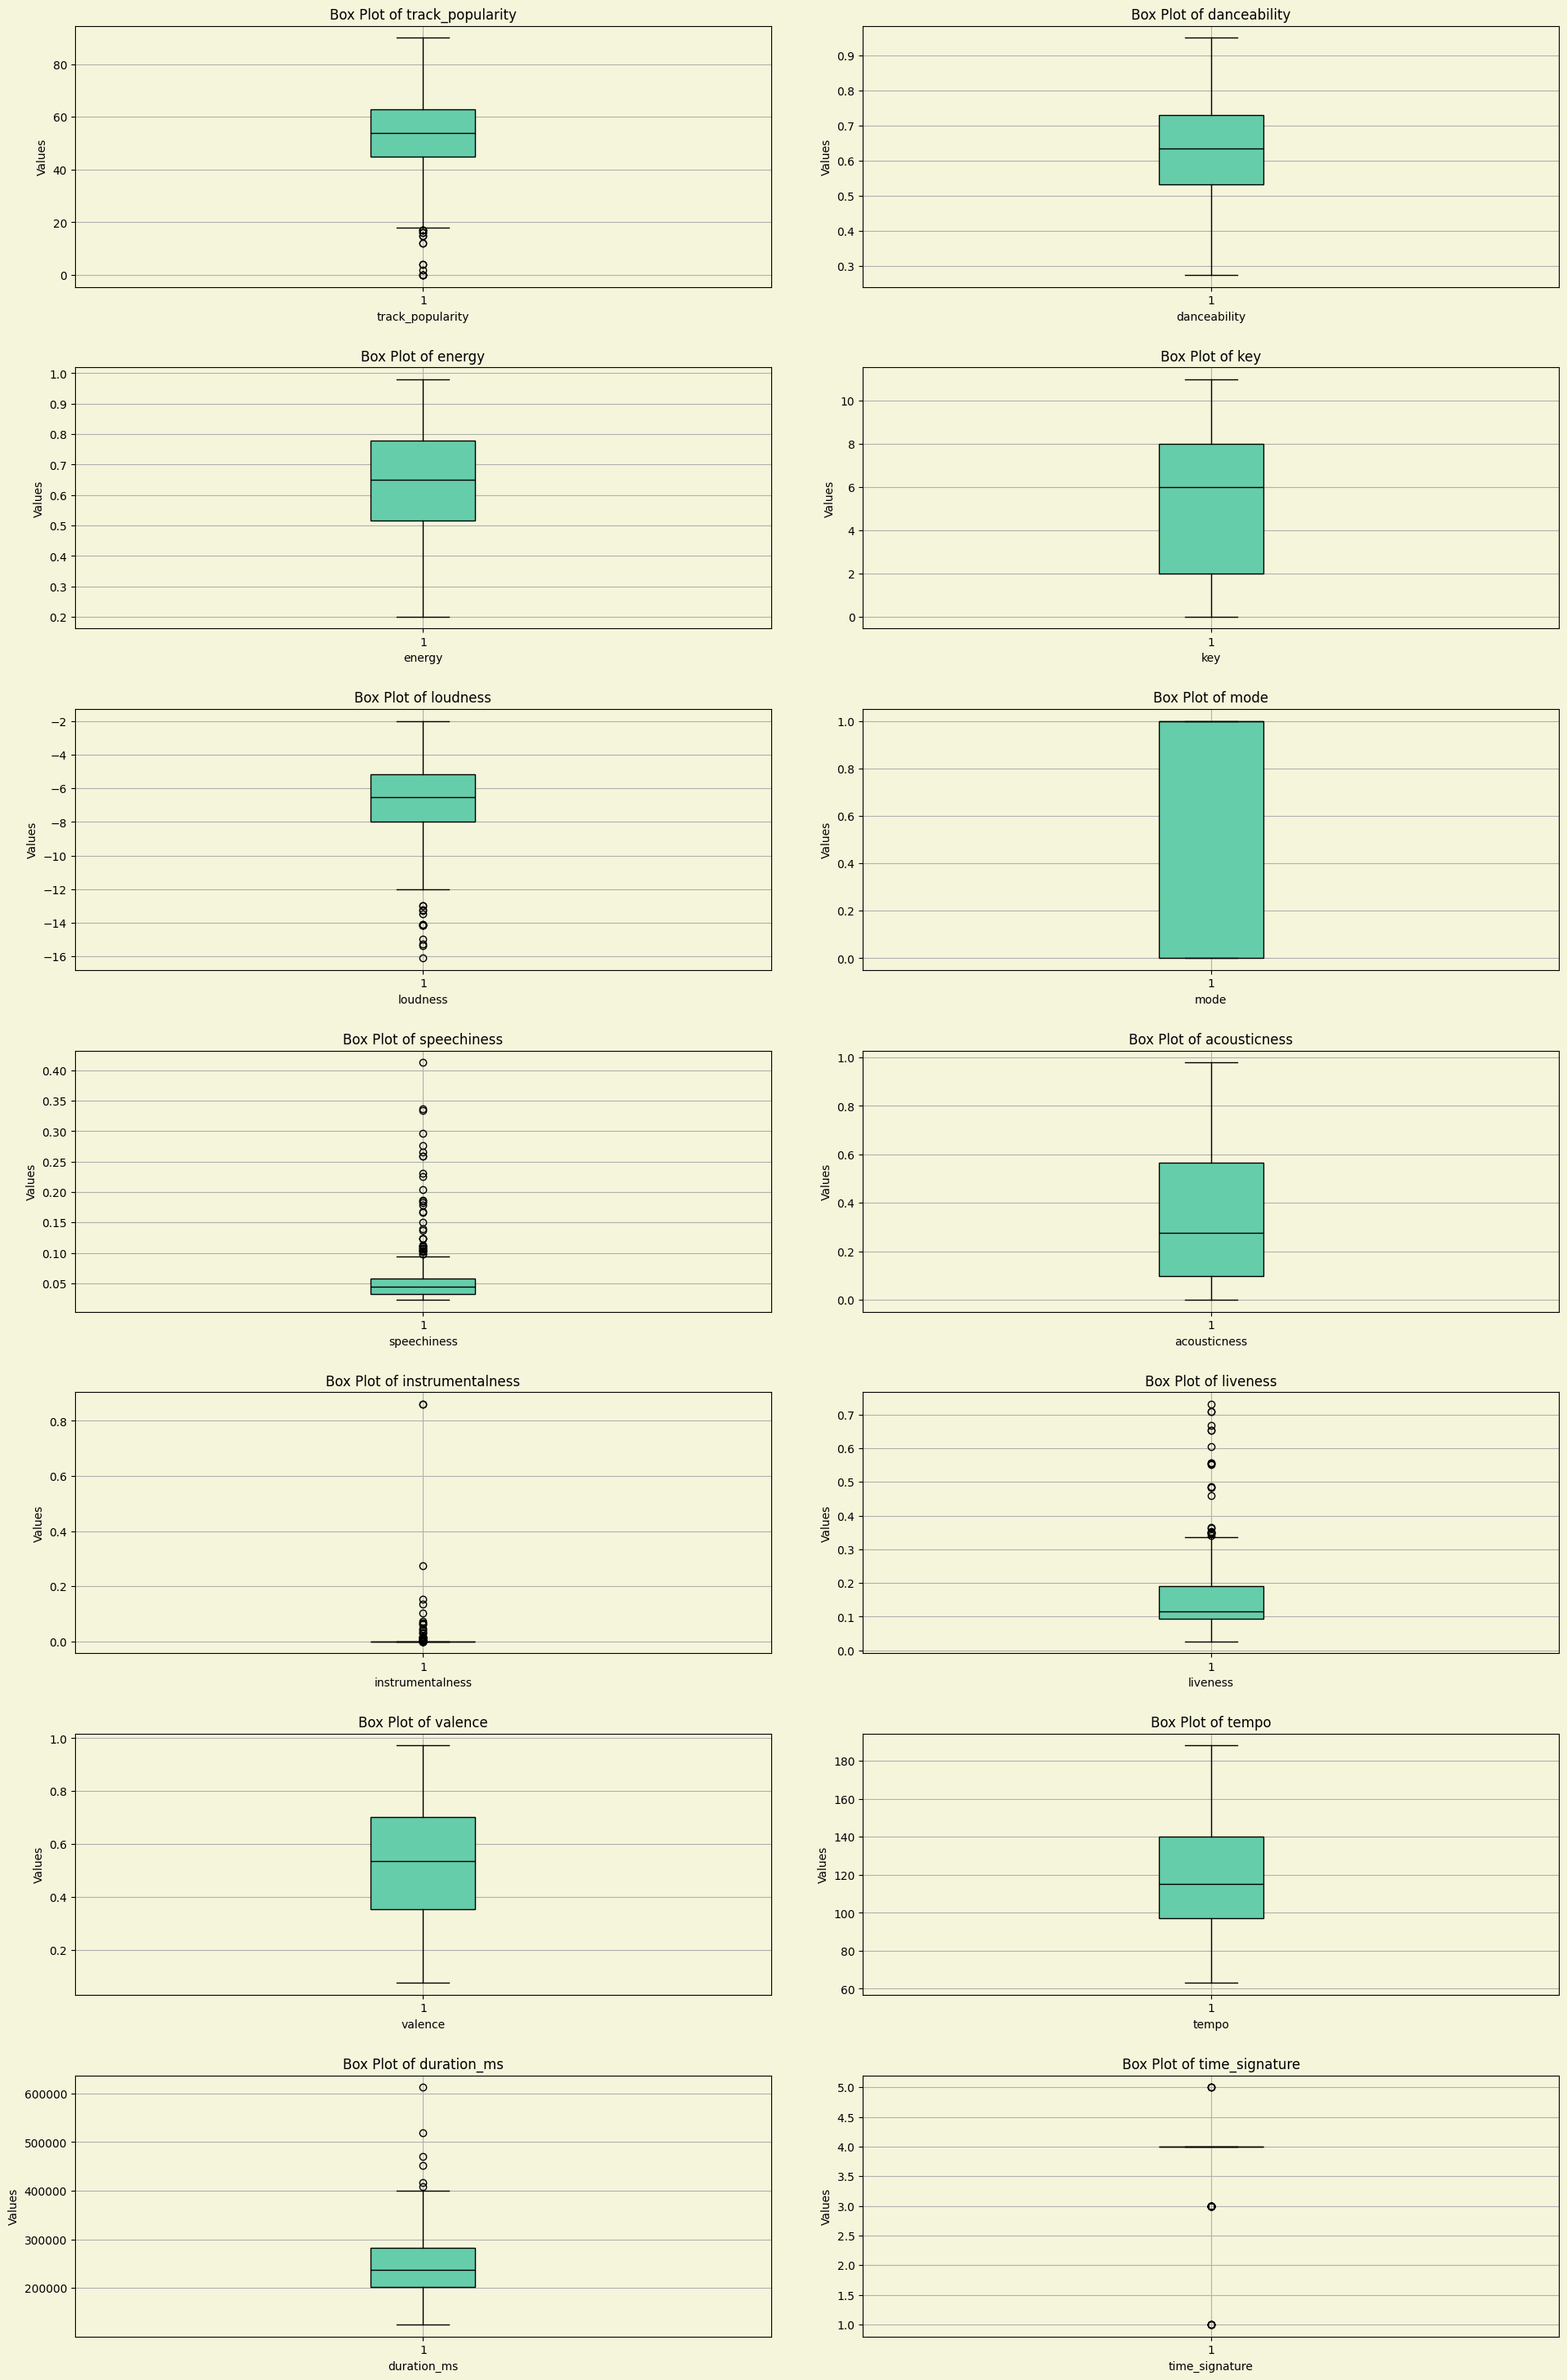

In [141]:
boxplot(user)

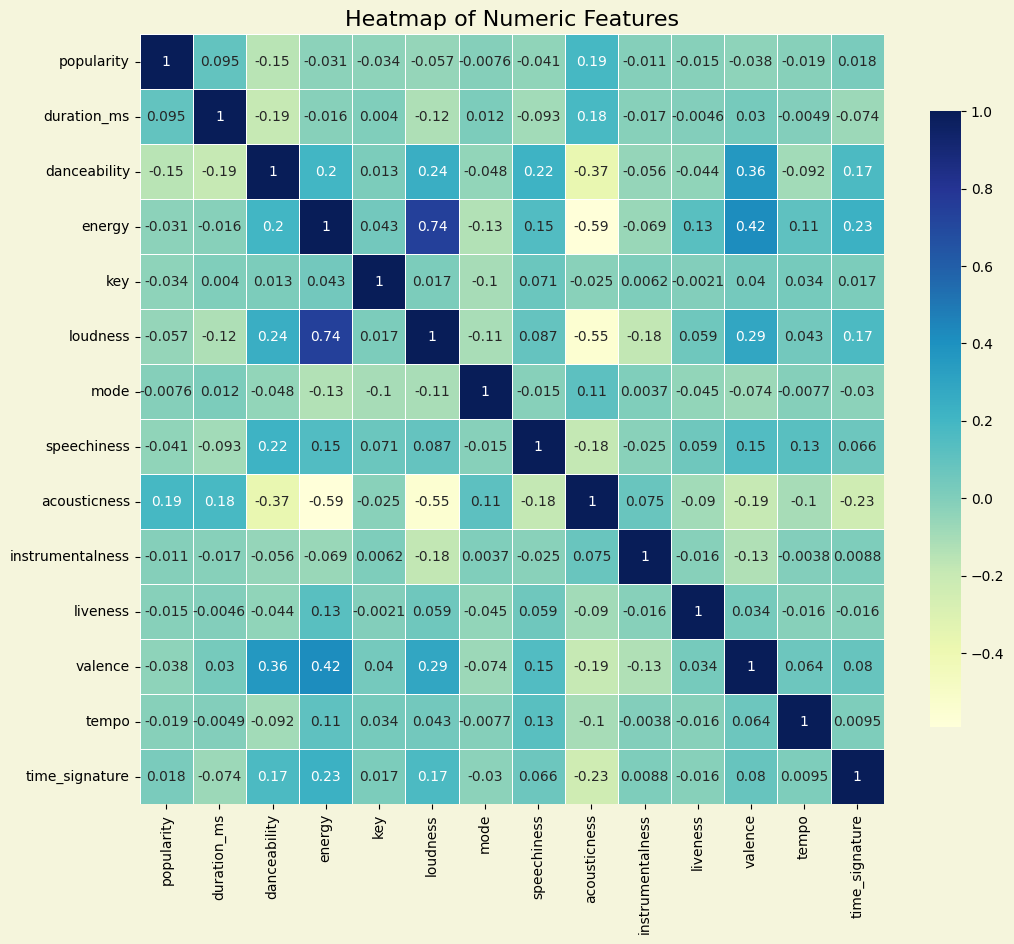

In [142]:
heatmap(user)

## Feature Engineering

### Missing Values

#### Songs Data

In [143]:
data.isna().sum()

artists             1
track_name          1
popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [144]:
data.dropna(inplace = True)

#### User

In [145]:
user.isna().sum()

track_name          2
artist_name         2
track_popularity    0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [146]:
user.dropna(inplace = True)

### Duplicates

#### Songs

In [148]:
def lowercase(df):
    for col in ['artists','track_name']:
        df[col] = df[col].apply(lambda x: x.lower())
    
lowercase(data)

In [149]:
data.shape

(4999, 16)

In [150]:
data.head()

,artists,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
20000,chris brown,under the influence,96,184613,0.733,0.690,9,-5.529,0,0.0427,0.0635,0.000001,0.105,0.310,116.992,4
20001,sam smith;kim petras,unholy (feat. kim petras),100,156943,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.266,0.238,131.121,4
20002,katy perry,harleys in hawaii,73,185815,0.722,0.757,10,-6.207,0,0.1320,0.1850,0.000006,0.126,0.721,140.094,4
20003,sean paul;dua lipa,no lie,83,221176,0.742,0.882,7,-2.862,1,0.1170,0.0466,0.000000,0.206,0.463,102.040,4
20004,the chainsmokers;halsey,closer,84,244960,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.111,0.661,95.010,4


In [151]:
def drop_duplicates(df):
    '''
    Drop duplicate songs
    '''
    df['artists_song'] = df.apply(lambda row: row['artists']+row['track_name'],axis = 1)
    return df.drop_duplicates('artists_song')

songs_clean = drop_duplicates(data)

In [152]:
songs_clean.shape

(3548, 17)

#### User

In [153]:
user = user.rename(columns = {'artist_name' : 'artists', 'track_popularity':'popularity','album':'album_name'})

In [154]:
lowercase(user)

In [155]:
user.shape

(309, 16)

In [156]:
user.head()

,track_name,artists,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,khwab dekhe sexy lady,pritam,54,0.818,0.829,8,-7.145,0,0.0978,0.303,0.000085,0.2770,0.967,108.999,279357,4
1,"laal peeli akhiyaan (from ""teri baaton mein ai...",tanishk bagchi,63,0.844,0.794,8,-5.943,1,0.0475,0.131,0.000274,0.0525,0.670,129.986,188101,4
2,dus bahane,shaan,56,0.833,0.917,7,-5.498,1,0.0597,0.175,0.000002,0.1090,0.874,110.001,206947,4
3,"ek ladki ko dekha toh aisa laga (from ""ek ladk...",darshan raval,49,0.537,0.604,10,-7.576,1,0.0540,0.757,0.000000,0.3220,0.410,173.915,155172,4
4,naina da kya kasoor,amit trivedi,59,0.712,0.659,9,-6.348,1,0.0538,0.159,0.012900,0.0781,0.545,63.048,210952,4


In [157]:
user_clean = drop_duplicates(user)
user_clean.shape

(245, 17)

In [158]:
user_clean.columns

Index(['track_name', 'artists', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'artists_song'],
      dtype='object')

In [159]:
songs_clean.columns

Index(['artists', 'track_name', 'popularity', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'artists_song'],
      dtype='object')

In [160]:
user_clean.drop(['artists_song'], axis = 1, inplace = True)
songs_clean.drop(['artists_song'], axis = 1, inplace = True)

C:\Users\Deep\AppData\Local\Temp\ipykernel_1092\2118333323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_clean.drop(['artists_song'], axis = 1, inplace = True)
C:\Users\Deep\AppData\Local\Temp\ipykernel_1092\2118333323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_clean.drop(['artists_song'], axis = 1, inplace = True)


### Scaling

#### Songs

In [161]:
song_features = songs_clean.select_dtypes(include = ['float64', 'int64'])
song_features

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
20000,96,184613,0.733,0.690,9,-5.529,0,0.0427,0.0635,0.000001,0.1050,0.310,116.992,4
20001,100,156943,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,4
20002,73,185815,0.722,0.757,10,-6.207,0,0.1320,0.1850,0.000006,0.1260,0.721,140.094,4
20003,83,221176,0.742,0.882,7,-2.862,1,0.1170,0.0466,0.000000,0.2060,0.463,102.040,4
20004,84,244960,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.1110,0.661,95.010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81994,64,245629,0.876,0.834,7,-4.653,1,0.1370,0.1640,0.000210,0.1080,0.788,103.012,4
81995,64,344360,0.448,0.607,9,-4.606,0,0.0611,0.7910,0.000000,0.0888,0.484,139.509,4
81996,64,322506,0.773,0.436,4,-10.972,0,0.0321,0.6720,0.006780,0.1970,0.533,115.917,4
81997,62,197716,0.639,0.368,2,-14.096,0,0.0480,0.2450,0.000000,0.1060,0.415,89.940,4


In [162]:
scaler = StandardScaler()

scaled = scaler.fit_transform(song_features)
song_scaled = pd.DataFrame(scaled, columns = song_features.columns)
song_scaled

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.824088,-0.458331,0.656856,0.255051,1.041256,0.474762,-1.106549,-0.550997,-0.931918,-0.186061,-0.533846,-0.948365,-0.055850,0.208159
1,1.990288,-0.715143,0.520061,-0.898381,-0.907989,-0.116748,0.903710,-0.045030,-1.107846,-0.186029,0.679582,-1.279090,0.436807,0.208159
2,0.868439,-0.447175,0.577659,0.609546,1.319720,0.257512,-1.106549,0.482936,-0.508646,-0.186012,-0.375573,0.939525,0.749682,0.208159
3,1.283938,-0.118981,0.721654,1.270917,0.484329,1.329343,0.903710,0.309263,-0.990793,-0.186073,0.227373,-0.245574,-0.577204,0.208159
4,1.325488,0.101764,0.764853,-0.623250,0.762793,0.452332,0.903710,-0.654043,0.289126,-0.186073,-0.488625,0.663921,-0.822330,0.208159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.494489,0.107973,1.686422,1.016951,0.484329,0.755457,0.903710,0.540827,-0.581805,-0.184053,-0.511236,1.247284,-0.543312,0.208159
3544,0.494489,1.024318,-1.395075,-0.184100,1.041256,0.770517,-1.106549,-0.337958,1.602489,-0.186073,-0.655943,-0.149112,0.729284,0.208159
3545,0.494489,0.821486,0.944847,-1.088856,-0.351062,-1.269327,-1.106549,-0.673726,1.187926,-0.120854,0.159541,0.075965,-0.093334,0.208159
3546,0.411389,-0.336719,-0.019921,-1.448642,-0.907989,-2.270343,-1.106549,-0.489633,-0.299623,-0.186073,-0.526309,-0.466057,-0.999113,0.208159


#### User

In [163]:
user_features = user_clean.select_dtypes(include = ['float64', 'int64'])
user_features

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,54,0.818,0.829,8,-7.145,0,0.0978,0.30300,0.000085,0.2770,0.9670,108.999,279357,4
1,63,0.844,0.794,8,-5.943,1,0.0475,0.13100,0.000274,0.0525,0.6700,129.986,188101,4
2,56,0.833,0.917,7,-5.498,1,0.0597,0.17500,0.000002,0.1090,0.8740,110.001,206947,4
3,49,0.537,0.604,10,-7.576,1,0.0540,0.75700,0.000000,0.3220,0.4100,173.915,155172,4
4,59,0.712,0.659,9,-6.348,1,0.0538,0.15900,0.012900,0.0781,0.5450,63.048,210952,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,67,0.590,0.555,2,-6.861,1,0.0271,0.48100,0.000000,0.1920,0.1910,84.027,223460,4
305,25,0.448,0.401,5,-13.444,1,0.0302,0.81500,0.067700,0.0829,0.2180,136.979,356566,4
306,29,0.566,0.499,1,-8.473,0,0.0370,0.77600,0.000000,0.1130,0.4570,159.992,176863,3
309,28,0.322,0.201,9,-13.244,1,0.0320,0.94000,0.000874,0.0695,0.0744,136.222,327363,4


In [164]:
scaled = scaler.fit_transform(user_features)
user_scaled = pd.DataFrame(scaled, columns = user_features.columns)
user_scaled

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.055687,1.299466,1.081123,0.769001,-0.145170,-1.422916,0.632179,-0.082743,-0.142674,0.972256,1.905420,-0.321233,0.512734,0.239154
1,0.575987,1.479818,0.875857,0.769001,0.313003,0.702782,-0.258467,-0.716429,-0.139521,-0.896540,0.545655,0.461572,-0.870314,0.239154
2,0.171310,1.403515,1.597220,0.475077,0.482626,0.702782,-0.042445,-0.554324,-0.144067,-0.426219,1.479635,-0.283859,-0.584690,0.239154
3,-0.233368,-0.649719,-0.238444,1.356849,-0.309457,0.702782,-0.143373,1.589894,-0.144099,1.346848,-0.644711,2.100103,-1.369376,0.239154
4,0.344743,0.564186,0.084117,1.062925,0.158627,0.702782,-0.146915,-0.613271,0.071424,-0.683439,-0.026637,-2.035183,-0.523991,0.239154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.807232,-0.282079,-0.525816,-0.994543,-0.036917,0.702782,-0.619683,0.573048,-0.144099,0.264694,-1.647366,-1.252677,-0.334424,0.239154
241,-1.620835,-1.267077,-1.428986,-0.112771,-2.546198,0.702782,-0.564792,1.803578,0.986979,-0.643482,-1.523751,0.722408,1.682891,0.239154
242,-1.389590,-0.448558,-0.854241,-1.288466,-0.651372,-1.422916,-0.444387,1.659894,-0.144099,-0.392922,-0.429530,1.580782,-1.040634,-1.930943
243,-1.447401,-2.141089,-2.601934,1.062925,-2.469963,0.702782,-0.532920,2.264106,-0.129497,-0.755027,-2.181200,0.694172,1.240299,0.239154


## Cosine Similarity

In [165]:
user_profile = user_scaled.mean(axis = 0)
user_profile

popularity          1.450087e-16
danceability        1.450087e-17
energy              9.026793e-16
key                -4.350262e-17
loudness           -7.177932e-16
mode               -9.063045e-17
speechiness         3.625218e-18
acousticness       -2.900174e-17
instrumentalness   -1.812609e-17
liveness            6.162871e-17
valence            -7.250436e-17
tempo               5.945358e-16
duration_ms        -2.401707e-17
time_signature     -5.800349e-17
dtype: float64

In [166]:
# Calculate similarity
similarity = cosine_similarity([user_profile], song_scaled)[0]

# Add similarity scores to the songs dataframe
songs_clean['similarity'] = similarity

# Sort the songs by similarity
recommended_songs = songs_clean.sort_values(by='similarity', ascending=False)

print(recommended_songs[['track_name', 'artists', 'similarity']])


                                 track_name  \
51367         genda phool (feat. payal dev)   
51610  tere naal nachna (from "nawabzaade")   
81071                        chand sifarish   
20717                           temperature   
55306                               khatola   
...                                     ...   
81101                     i was never there   
65955   mann uda uda jaye - from "dear dia"   
55325                  subhanallah lofi mix   
55587                        kaagaz ki naav   
55330   soulful love lofi (slowed & reverb)   

                                            artists    similarity  
51367                             badshah;payal dev  1.149826e-15  
51610                        badshah;sunanda sharma  1.113428e-15  
81071  jatin-lalit;shaan;kailash kher;prasoon joshi  1.101723e-15  
20717                                     sean paul  1.096191e-15  
55306                   kailash kher;sahil kulkarni  1.076259e-15  
...                        

C:\Users\Deep\AppData\Local\Temp\ipykernel_1092\3168428162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_clean['similarity'] = similarity


In [168]:
# Number of recommendations
N = 20

# Get top N recommendations
top_n_recommendations = recommended_songs.head(N)

print(top_n_recommendations[['track_name', 'artists', 'similarity']])

                                 track_name  \
51367         genda phool (feat. payal dev)   
51610  tere naal nachna (from "nawabzaade")   
81071                        chand sifarish   
20717                           temperature   
55306                               khatola   
51303                    goosebumps - remix   
20716        uptown funk (feat. bruno mars)   
65399               aambalaikum pombalaikum   
51012                                  oops   
20457                      marks on my neck   
81409                              godspeed   
65136        saachitale (from "love today")   
51285                      she move it like   
65444                      kovakkara kiliye   
51006                                dil nu   
20710                              how long   
55779                            g phaad ke   
51633                               adhoore   
51373                            gaddi vich   
51000                           summer high   

            

In [169]:
recommended_songs.head(20)

,artists,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,similarity
51367,badshah;payal dev,genda phool (feat. payal dev),62,170769,0.955,0.538,1,-8.394,1,0.0734,0.13200,0.001460,0.0704,0.837,116.977,4,1.149826e-15
51610,badshah;sunanda sharma,"tere naal nachna (from ""nawabzaade"")",60,166614,0.912,0.677,0,-4.212,1,0.0713,0.19300,0.000000,0.0939,0.940,115.061,4,1.113428e-15
81071,jatin-lalit;shaan;kailash kher;prasoon joshi,chand sifarish,72,275931,0.829,0.665,2,-8.128,1,0.0868,0.24200,0.000017,0.1230,0.861,122.043,4,1.101723e-15
20717,sean paul,temperature,79,218573,0.951,0.600,0,-4.675,0,0.0685,0.10600,0.000000,0.0712,0.822,125.040,4,1.096191e-15
55306,kailash kher;sahil kulkarni,khatola,40,221400,0.848,0.579,0,-9.111,1,0.1450,0.25600,0.000002,0.1690,0.961,99.942,4,1.076259e-15
51303,travis scott;hvme,goosebumps - remix,81,162802,0.841,0.593,1,-7.846,1,0.0379,0.41800,0.000000,0.1240,0.808,124.917,4,1.062526e-15
20716,mark ronson;bruno mars,uptown funk (feat. bruno mars),83,269666,0.856,0.609,0,-7.223,1,0.0824,0.00801,0.000082,0.0344,0.928,114.988,4,1.060711e-15
65399,yuvan shankar raja;krishnaraj;velmurugan;sathyan,aambalaikum pombalaikum,53,301173,0.856,0.682,1,-8.146,1,0.1570,0.43200,0.003790,0.2240,0.767,127.982,4,1.052138e-15
51012,king,oops,75,163200,0.918,0.673,0,-5.084,1,0.1840,0.31400,0.000000,0.0555,0.828,99.952,4,1.043553e-15
20457,charlie puth,marks on my neck,66,138159,0.855,0.607,1,-8.587,1,0.0422,0.20000,0.000018,0.0723,0.943,142.002,4,1.042912e-15
